In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.isnull().sum()

,0
cgpa,0
placement_exam_marks,0
placed,0


In [5]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


<ipython-input-8-dd1eca269673>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

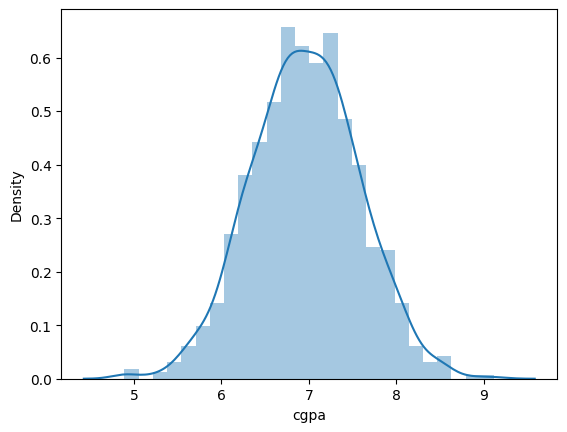

In [8]:
sns.distplot(df['cgpa'])

<ipython-input-9-3626882fb6fa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

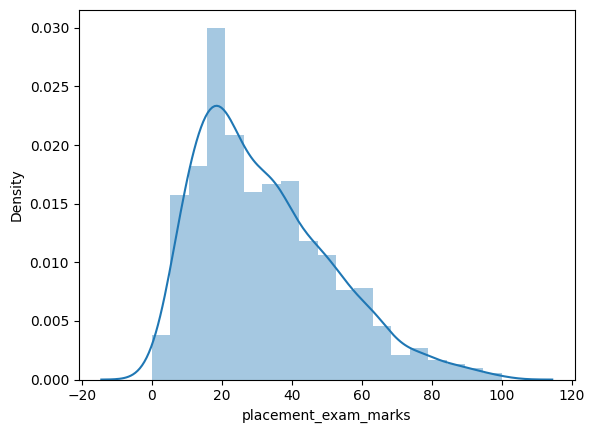

In [9]:
sns.distplot(df['placement_exam_marks'])

<ipython-input-10-6f624e14bf3f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placed'])


<Axes: xlabel='placed', ylabel='Density'>

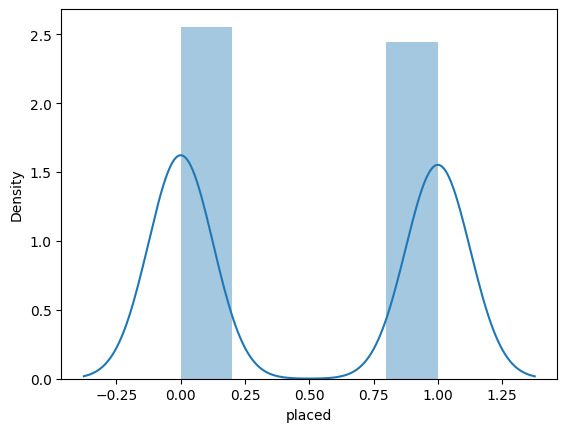

In [10]:
sns.distplot(df['placed'])

# Observation : CGPA is almost normally distributed so we can apply z score method to handle the outliers

# z = xi-u/s

In [12]:
mean_cgpa = df['cgpa'].mean()
std_cgpa = df['cgpa'].std()
min_cgpa = df['cgpa'].min()
max_cgpa = df['cgpa'].max()
print('Mean',mean_cgpa)
print('Std',std_cgpa)
print('Min',min_cgpa)
print('Max',max_cgpa)

Mean 6.96124
Std 0.6158978751323896
Min 4.89
Max 9.12


In [22]:
df.shape

(1000, 3)

<Axes: ylabel='cgpa'>

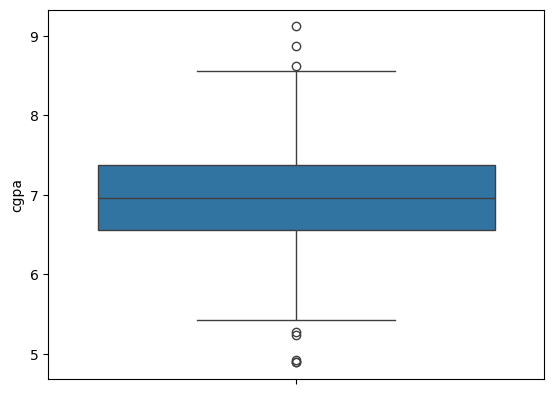

In [14]:
sns.boxplot(df['cgpa'])

In [18]:
llimit= mean_cgpa+-3*std_cgpa
mlimit= mean_cgpa+3*std_cgpa

# **Trimming**

In [20]:
new_df = df[(df['cgpa']>=llimit) & (df['cgpa']<=mlimit)]

In [23]:
new_df.shape

(995, 3)

<Axes: ylabel='cgpa'>

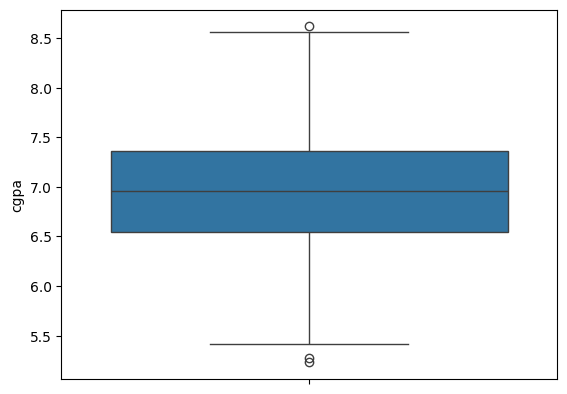

In [21]:
sns.boxplot(new_df['cgpa'])

# **Capping**

In [25]:
# we make updations to the original dataset

df['cgpa']=np.where(
    df['cgpa']>=mlimit,
    mlimit,
    np.where(
        df['cgpa']<=llimit,
        llimit,
        df['cgpa']
    )
)

In [27]:
# Mean 6.96124
# Std 0.6158978751323896
# Min 4.89
# Max 9.12

mean_cgpa = df['cgpa'].mean()
std_cgpa = df['cgpa'].std()
min_cgpa = df['cgpa'].min()
max_cgpa = df['cgpa'].max()
print('Mean',mean_cgpa)
print('Std',std_cgpa)
print('Min',min_cgpa)
print('Max',max_cgpa)

Mean 6.961498506374602
Std 0.6126883592648873
Min 5.113546374602832
Max 8.808933625397168


<Axes: ylabel='cgpa'>

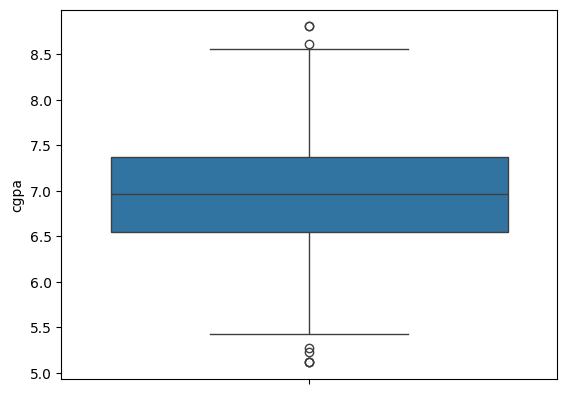

In [26]:
sns.boxplot(df['cgpa'])

<ipython-input-28-dd1eca269673>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

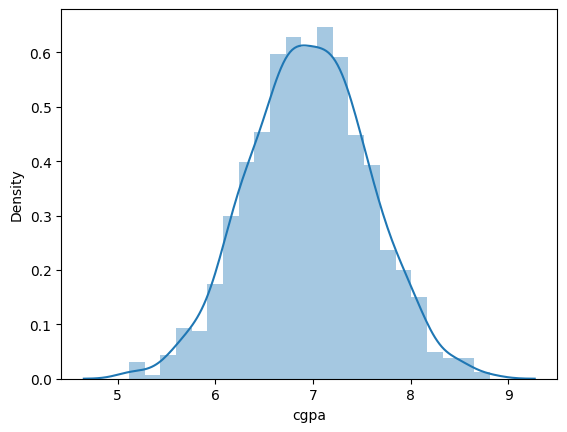

In [28]:
sns.distplot(df['cgpa'])

# **2** IOR Inter Quartile Range**

Used to handle outliers in case of skewd data





In [29]:
df2=pd.read_csv('/content/placement.csv')

<ipython-input-31-c972934a124c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

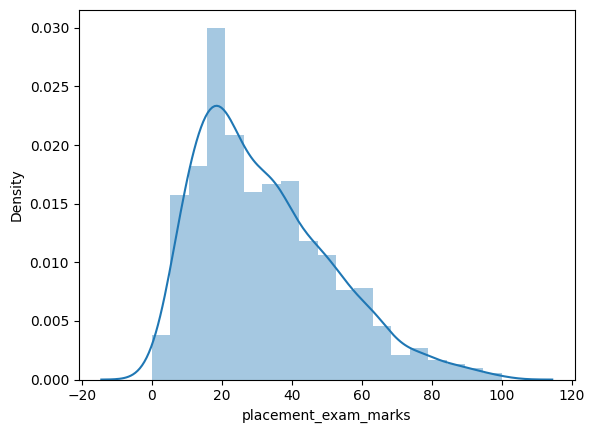

In [31]:
sns.distplot(df2['placement_exam_marks'])

<Axes: ylabel='placement_exam_marks'>

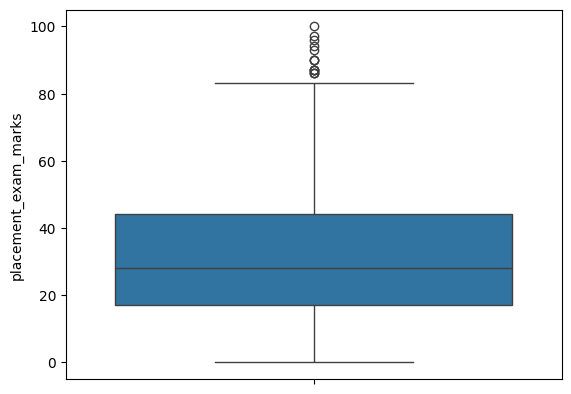

In [32]:
sns.boxplot(df2['placement_exam_marks'])

In [38]:
#Finding IQR

#IQR = Q3-Q1

Q1 = df2['placement_exam_marks'].quantile(.25)
Q3 = df2['placement_exam_marks'].quantile(.75)
print('Q-25% :',Q1,'Q-75% :',Q3)
IQR=Q3-Q1
print('IOQ :',IQR)

Q-25% : 17.0 Q-75% : 44.0
IOQ : 27.0


In [39]:
#limits

low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)
print(df2.shape)

-23.5
84.5
(1000, 3)


In [42]:
#Trimming

new_df = df2[(df2['placement_exam_marks']>low_lim) & (df2['placement_exam_marks']<up_lim)]
new_df.shape

(985, 3)

<ipython-input-45-abe66d150c2d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['placement_exam_marks'])
<ipython-input-45-abe66d150c2d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

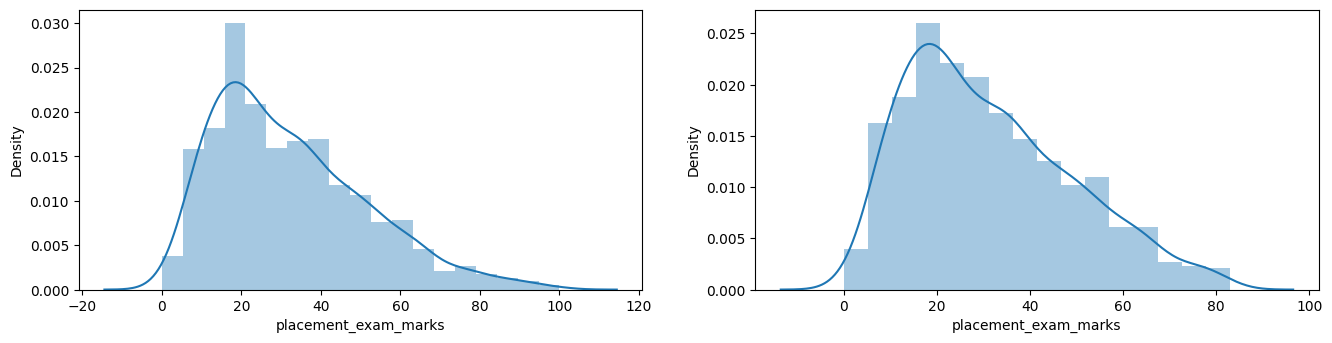

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2['placement_exam_marks'])

plt.subplot(2,2,2)
sns.distplot(new_df['placement_exam_marks'])

In [47]:
#caping
cap_df = pd.read_csv('/content/placement.csv')

cap_df['placement_exam_marks']=np.where(cap_df['placement_exam_marks']>up_lim,
                                        up_lim,
                                        np.where(cap_df['placement_exam_marks']<low_lim,
                                                 low_lim,
                                                 df['placement_exam_marks']
                                                 ))
cap_df.shape

(1000, 3)

<ipython-input-50-3838c24cb388>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['placement_exam_marks'])
<ipython-input-50-3838c24cb388>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cap_df['placement_exam_marks'])


<Axes: ylabel='placement_exam_marks'>

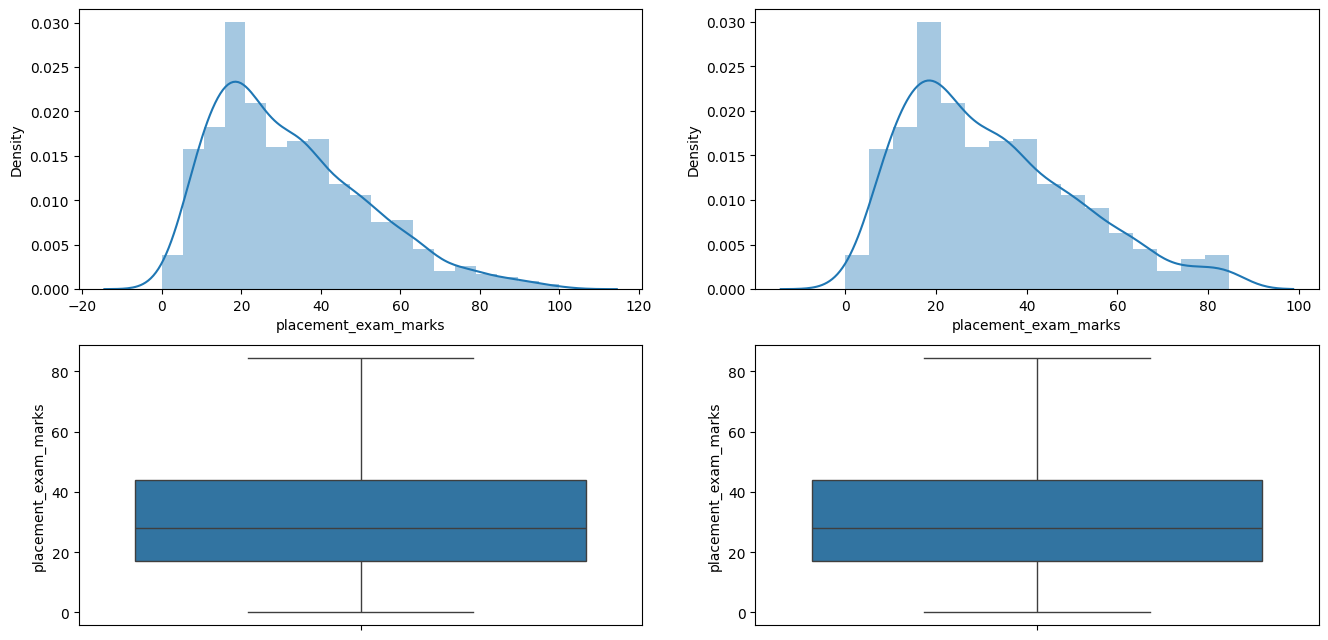

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2['placement_exam_marks'])

plt.subplot(2,2,2)
sns.distplot(cap_df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.boxplot(cap_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(cap_df['placement_exam_marks'])